# 0.6_ss_tuning

In [1]:
%run util.py

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
le.classes_

array(['B', 'M'], dtype=object)

In [7]:
le.transform(["M", "B"])

array([1, 0])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [11]:
pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    LogisticRegression(random_state=1)
)

In [12]:
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [13]:
y_pred = pipe_lr.predict(X_test)

In [14]:
pipe_lr.score(X_test, y_test)

0.956140350877193

In [15]:
from sklearn.model_selection import StratifiedKFold

In [16]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1).split(X_train, y_train)

In [17]:
scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print(f"Fold: {k+1}, Class dist.: {np.bincount(y_train[train])}, Acc: {score:.3f}")

Fold: 1, Class dist.: [256 153], Acc: 0.913
Fold: 2, Class dist.: [256 153], Acc: 1.000
Fold: 3, Class dist.: [256 153], Acc: 0.957
Fold: 4, Class dist.: [256 153], Acc: 0.978
Fold: 5, Class dist.: [256 153], Acc: 0.891
Fold: 6, Class dist.: [257 153], Acc: 0.933
Fold: 7, Class dist.: [257 153], Acc: 0.933
Fold: 8, Class dist.: [257 153], Acc: 0.978
Fold: 9, Class dist.: [257 153], Acc: 0.978
Fold: 10, Class dist.: [257 153], Acc: 0.911


In [18]:
f"CV Accuracy {np.mean(scores):.3f} +/- {np.std(scores):.3f}"

'CV Accuracy 0.947 +/- 0.034'

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)

In [21]:
scores

array([0.93478261, 0.93478261, 0.95652174, 0.95652174, 0.93478261,
       0.95555556, 0.97777778, 0.93333333, 0.95555556, 0.95555556])

In [22]:
f"CV Accuracy {np.mean(scores):.3f} +/- {np.std(scores):.3f}"

'CV Accuracy 0.950 +/- 0.014'

In [23]:
from sklearn.model_selection import learning_curve

In [24]:
pipe_lr = make_pipeline(
    StandardScaler(), 
    LogisticRegression(penalty='l2', random_state=1)
)

In [25]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv = 10,
    n_jobs = 1
)

In [26]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

Text(0, 0.5, 'Accuracy')

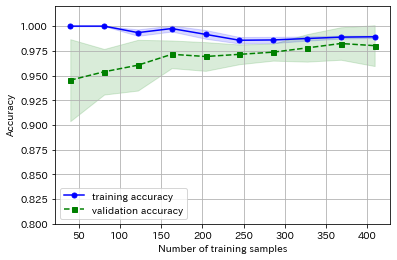

In [27]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean+ test_std, test_mean - test_std, alpha=0.15, color='green')
plt.legend()
plt.ylim([0.8, 1.02])
plt.grid()
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")

In [28]:
from sklearn.model_selection import validation_curve

In [29]:
param_range = [10.**i for i in range(-3, 3)]

In [30]:
train_scores, test_scores = validation_curve(
    estimator=pipe_lr, 
    X=X_train,
    y=y_train,
    param_name='logisticregression__C',
    param_range=param_range,
    cv=10
)

/Users/shouta_shimizu/.local/share/virtualenvs/python-machine-learning-6hUrazaR/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/shouta_shimizu/.local/share/virtualenvs/python-machine-learning-6hUrazaR/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also ref

In [31]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

(0.8, 1.02)

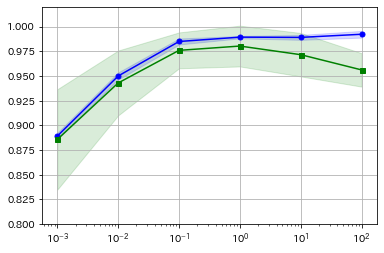

In [32]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', marker='s', markersize=5, label='testing accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xscale('log')
plt.grid()
plt.ylim([0.8, 1.02])

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [34]:
pipe_svc = make_pipeline(
    StandardScaler(),
    SVC(random_state=1)
)

In [35]:
param_range = [10.**i for i in range(-4, 4)]

In [36]:
param_grid = [
    {'svc__C': param_range, 'svc__kernel': ['linear']},
    {'svc__C': param_range, 'svc__kernel': ['rbf'], 'svc__gamma': param_range},
]

In [37]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

In [38]:
gs = gs.fit(X_train, y_train)

In [39]:
print(gs.best_score_)

0.9846859903381642


In [40]:
print(gs.best_params_)

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [41]:
clf = gs.best_estimator_

In [42]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=100.0, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.001,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=1, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [43]:
clf.score(X_test, y_test)

0.9736842105263158

In [44]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2)

In [45]:
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)

In [46]:
print(f'CV accuracy {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

CV accuracy 0.974 +/- 0.015


In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
gs = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid = [{'max_depth': [1,2,3,4,5,6,7,None]}],
    scoring='accuracy',
    cv=2
)

In [49]:
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)

In [50]:
print(f'CV accuracy {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

CV accuracy 0.934 +/- 0.016


In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
pipe_svc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [53]:
y_pred = pipe_svc.predict(X_test)

In [54]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [55]:
print(confmat)

[[71  1]
 [ 2 40]]


Text(0, 0.5, 'true label')

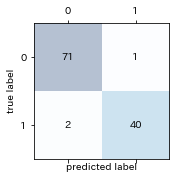

In [56]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [58]:
print(f"Precision: {precision_score(y_true=y_test, y_pred=y_pred):.3f}")
print(f"Recall: {recall_score(y_true=y_test, y_pred=y_pred):.3f}")
print(f"F1: {f1_score(y_true=y_test, y_pred=y_pred):.3f}")


Precision: 0.976
Recall: 0.952
F1: 0.964


In [59]:
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring=scorer, cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)

0.9880771478667446


In [60]:
print(gs.best_params_)

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [61]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    LogisticRegression(penalty='l2', random_state=1, C=100.)
)

In [62]:
X_train2 = X_train[:, [4, 14]]

In [64]:
cv = list(StratifiedKFold(n_splits=3, random_state=1, shuffle=True).split(X_train, y_train))

(-0.05, 1.05)

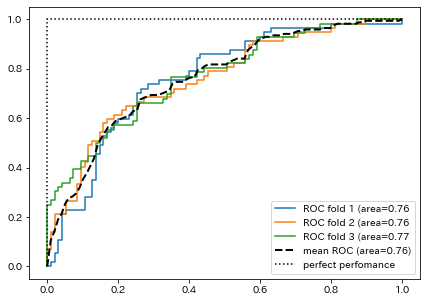

In [85]:
fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"ROC fold {i+1} (area={roc_auc:.2f}")

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label=f"mean ROC (area={mean_auc:.2f})", lw=2)
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='perfect perfomance')
plt.legend()
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

In [82]:
help(interp)

Help on function interp in module numpy:

interp(x, xp, fp, left=None, right=None, period=None)
    scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



In [86]:
pre_scorer = make_scorer(score_func=precision_score, pos_label=1, greater_is_better=True, average='micro')

In [89]:
X_imb = np.vstack((X[y==0], X[y==1][:40]))
y_imb = np.hstack((y[y==0], y[y==1][:40]))

In [90]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred==y_imb)*100

89.92443324937027

In [94]:
X_imb[y_imb==1].shape[0]

40

In [91]:
from sklearn.utils import resample
X_upsampled, y_upsampled = resample(X_imb[y_imb==1], y_imb[y_imb==1], replace=True, n_samples=X_imb[y_imb==0].shape[0], random_state=123)

In [92]:
print(X_upsampled.shape[0])

357
